#  Load and Understand the Dataset

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')


In [3]:
# Step 2: Load the dataset
# Assuming the dataset 'dermatology.csv' is in the same directory as your script
file_path = 'dermatology.csv'
data = pd.read_csv(file_path)

# Step 3: Preview the dataset
print("Dataset Preview:")
print(data.head())

# Step 4: Check basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Step 5: Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())


Dataset Preview:
   erythema  scaling  definiteBorders  itching  koebnerPhenomenon  \
0         2        2                0        3                  0   
1         3        3                3        2                  1   
2         2        1                2        3                  1   
3         2        2                2        0                  0   
4         2        3                2        2                  2   

   polygonalPapules  follicularPapules  oralMucosal  kneeElbow  scalp  ...  \
0                 0                  0            0          1      0  ...   
1                 0                  0            0          1      1  ...   
2                 3                  0            3          0      0  ...   
3                 0                  0            0          3      2  ...   
4                 2                  0            2          0      0  ...   

   granularLayer  vacuolisation  spongiosis  sawtooth  follicularHornPlug  \
0              0      

# Handle Missing Values

In [4]:
# Step 1: Handle missing values
# Replace missing values in the 'age' column with the median
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)

# Verify that there are no missing values now
print("\nMissing Values Count After Imputation:")
print(data.isnull().sum())



Missing Values Count After Imputation:
erythema                       0
scaling                        0
definiteBorders                0
itching                        0
koebnerPhenomenon              0
polygonalPapules               0
follicularPapules              0
oralMucosal                    0
kneeElbow                      0
scalp                          0
familyHistory                  0
melaninIncontinence            0
eosinophils                    0
PNL                            0
fibrosis                       0
exocytosis                     0
acanthosis                     0
hyperkeratosis                 0
parakeratosis                  0
clubbing                       0
elongation                     0
epidermisThinning              0
spongiformPustule              0
munroMicroabcess               0
focalHypergranulosis           0
granularLayer                  0
vacuolisation                  0
spongiosis                     0
sawtooth                       0
fol

# Target Variable Distribution


Diagnosis Value Counts:
diagnosis
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


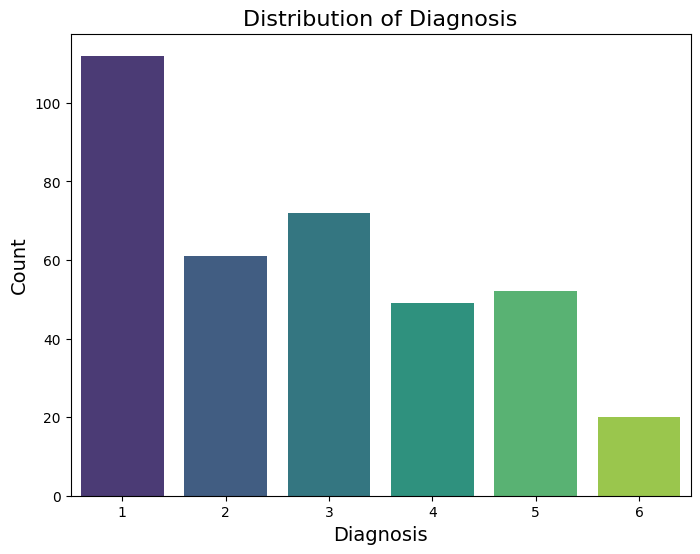

In [16]:
# Step 1: Analyze the target variable distribution

# Value counts for the diagnosis column
diagnosis_counts = data['diagnosis'].value_counts()
print("\nDiagnosis Value Counts:")
print(diagnosis_counts)

# Plot the distribution of the diagnosis column
plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")
plt.title("Distribution of Diagnosis", fontsize=16)
plt.xlabel("Diagnosis", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()



Correlation with Diagnosis:
diagnosis                      1.000000
fibrosis                       0.526976
follicularPapules              0.477813
perifollicularParakeratosis    0.457025
follicularHornPlug             0.431972
exocytosis                     0.283433
spongiosis                     0.213401
focalHypergranulosis           0.063241
sawtooth                       0.060444
polygonalPapules               0.057785
melaninIncontinence            0.057394
bandnfiltrate                  0.057266
oralMucosal                    0.055805
vacuolisation                  0.055402
itching                        0.054772
inflammatory                  -0.020402
hyperkeratosis                -0.054428
eosinophils                   -0.062323
acanthosis                    -0.079771
koebnerPhenomenon             -0.091323
familyHistory                 -0.144381
age                           -0.251228
erythema                      -0.335537
elongation                    -0.357924
kneeElbow  

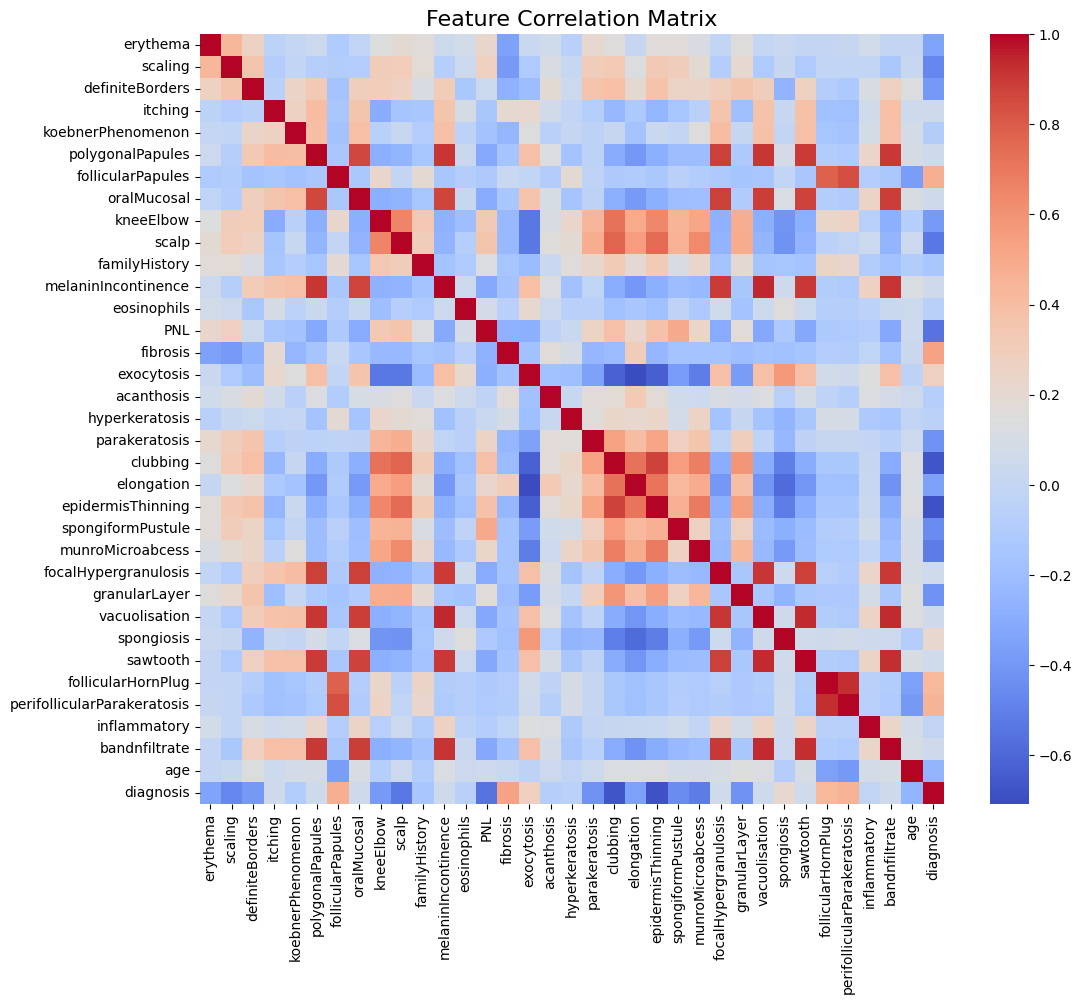

In [17]:
# Step 2: Analyze feature correlations
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation with the target variable (diagnosis)
correlation_with_target = correlation_matrix['diagnosis'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:")
print(correlation_with_target)

# Plot the heatmap of the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', cbar=True)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()


#  Feature Selection and Visualization

In [7]:
# Step 1: Select features with high absolute correlation
threshold = 0.4
relevant_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()
relevant_features.remove('diagnosis')  # Exclude the target itself
print("Relevant Features based on correlation threshold (>|0.4|):", relevant_features)


Relevant Features based on correlation threshold (>|0.4|): ['fibrosis', 'follicularPapules', 'perifollicularParakeratosis', 'follicularHornPlug', 'parakeratosis', 'granularLayer', 'spongiformPustule', 'scaling', 'munroMicroabcess', 'scalp', 'PNL', 'clubbing', 'epidermisThinning']


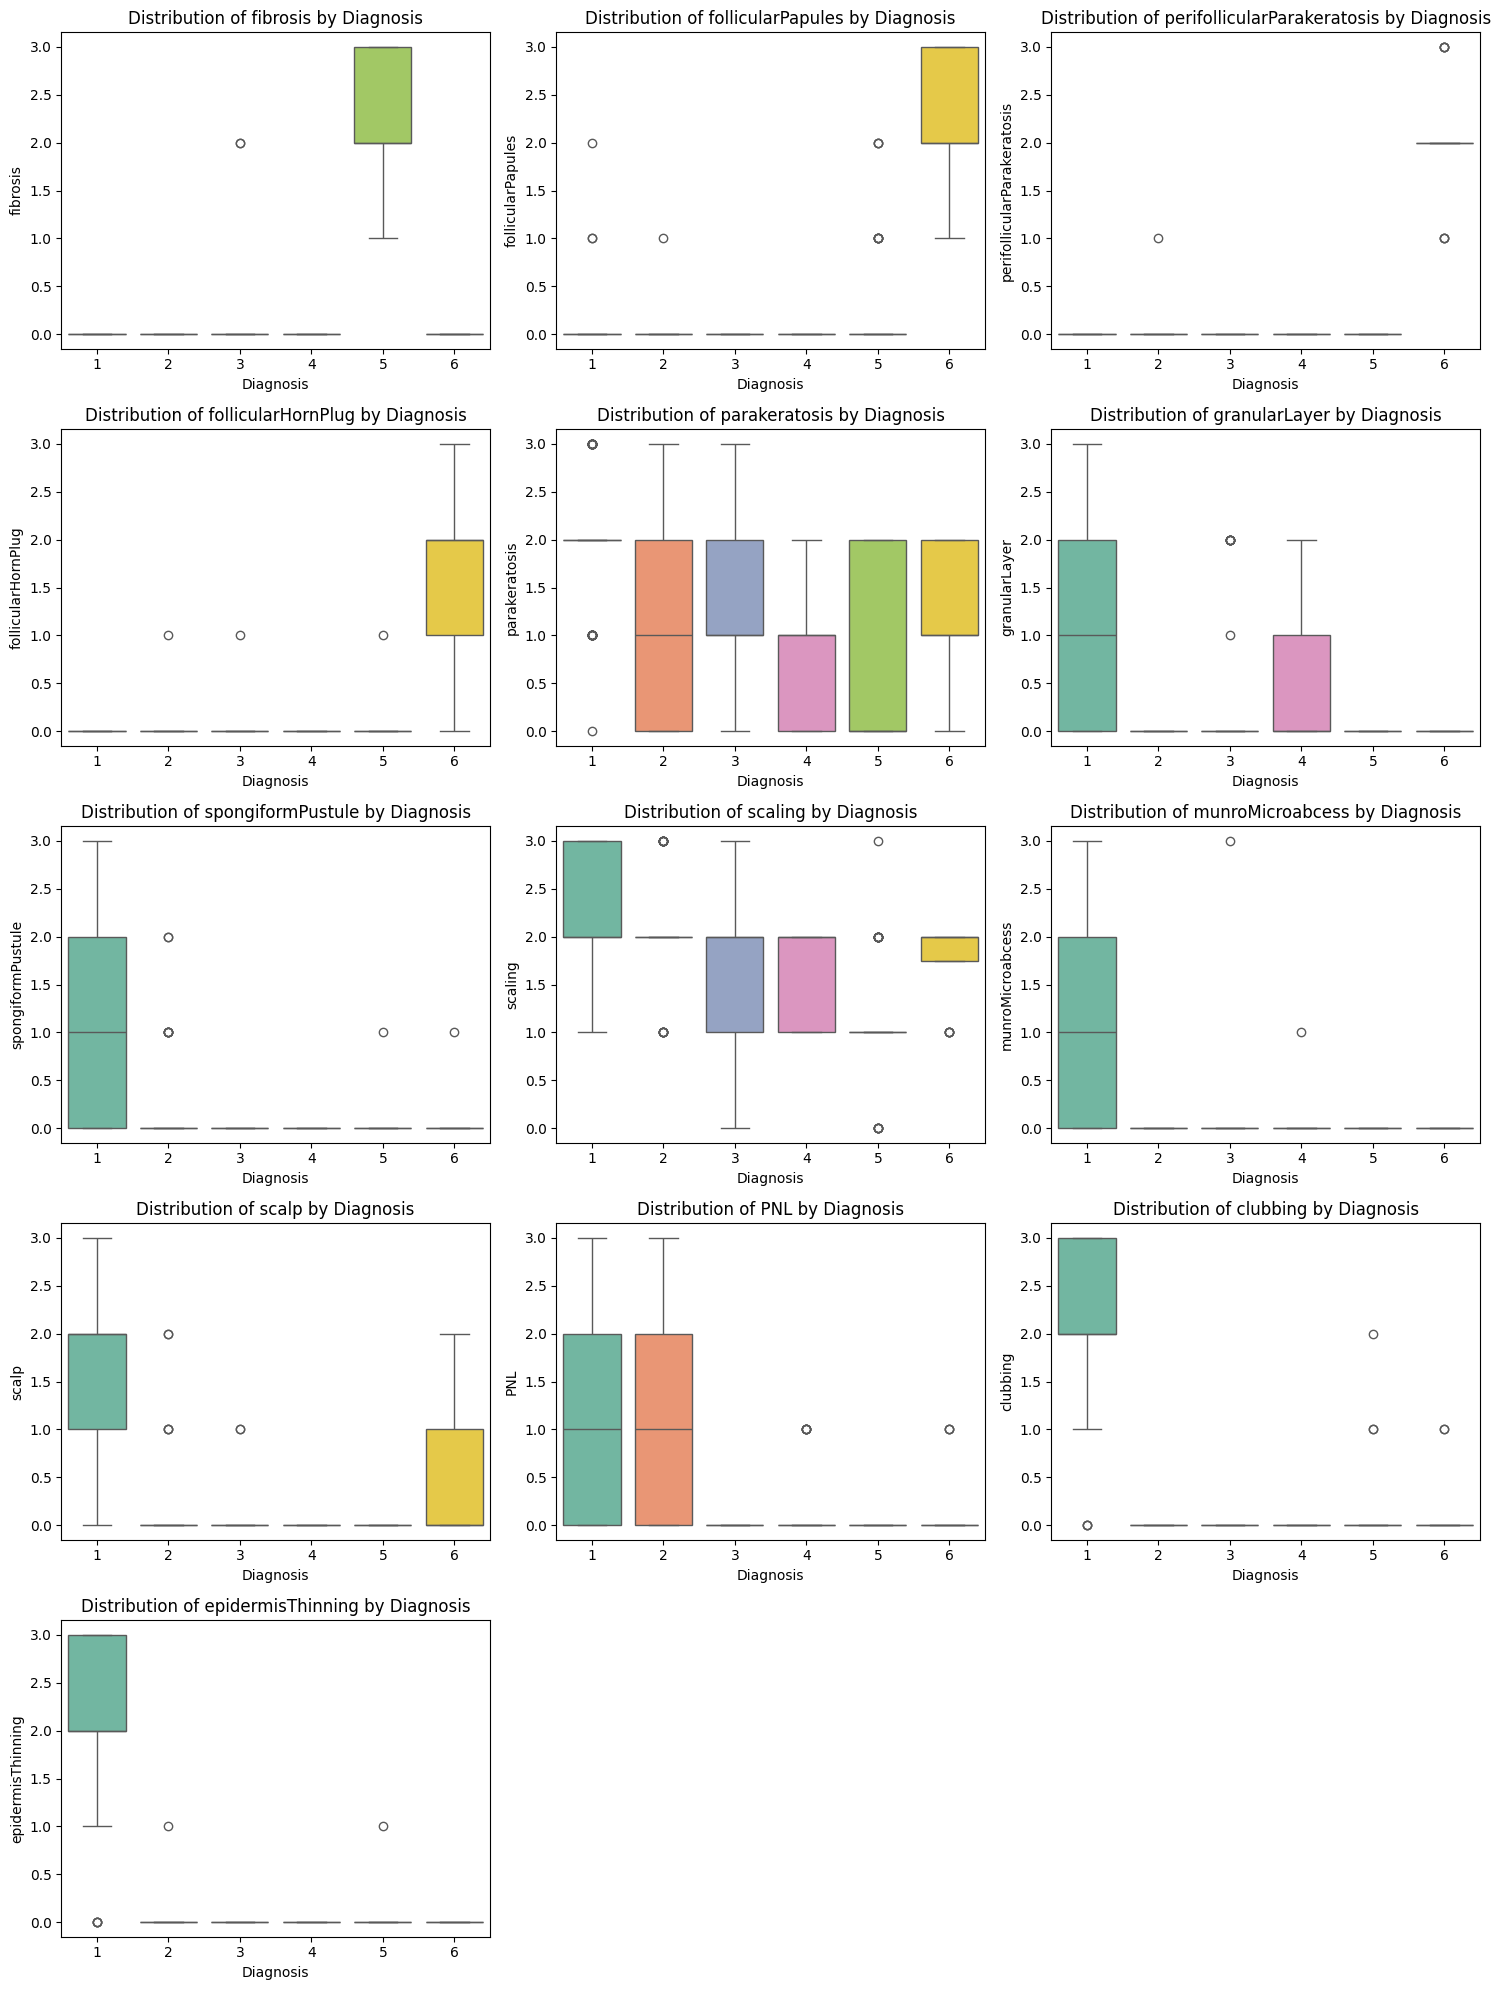

In [18]:
# Calculate the number of rows and columns dynamically based on the number of features
num_features = len(relevant_features)
rows = math.ceil(num_features / 3)  # 3 columns per row

plt.figure(figsize=(15, rows * 4))  # Adjust height dynamically

for i, feature in enumerate(relevant_features, 1):
    plt.subplot(rows, 3, i)  # Dynamically set grid size
    sns.boxplot(data=data, x='diagnosis', y=feature, palette='Set2')
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


# Data Preparation for Modeling

In [10]:
# Select features and target
X = data[relevant_features]  # Use only the relevant features
y = data['diagnosis']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)       # Transform test data based on training fit

print("Data preparation complete!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Data preparation complete!
Training set shape: (292, 13)
Test set shape: (74, 13)


# Building and Evaluating a Decision Tree Classifier

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.75      0.75      0.75        12
           3       0.73      0.73      0.73        15
           4       0.75      0.60      0.67        10
           5       0.91      1.00      0.95        10
           6       0.80      1.00      0.89         4

    accuracy                           0.85        74
   macro avg       0.82      0.85      0.83        74
weighted avg       0.85      0.85      0.85        74

Accuracy: 0.8513513513513513


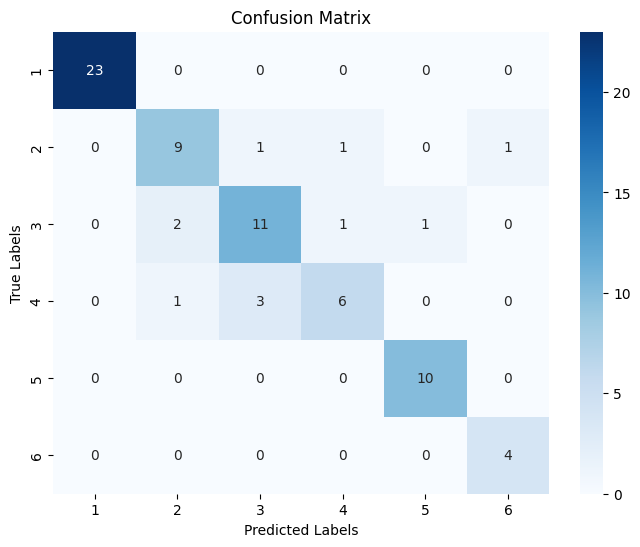

In [19]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Hyperparameter Tuning (Using GridSearchCV for tuning the Decision Tree)

In [12]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV:", best_params)

# Train a model using the best parameters
best_dt_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_dt_model.predict(X_test)

# Classification report for the tuned model
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

# Accuracy for the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {tuned_accuracy}")


Best Parameters from GridSearchCV: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.67      0.83      0.74        12
           3       0.73      0.73      0.73        15
           4       0.83      0.50      0.62        10
           5       0.91      1.00      0.95        10
           6       0.75      0.75      0.75         4

    accuracy                           0.84        74
   macro avg       0.82      0.80      0.80        74
weighted avg       0.84      0.84      0.83        74

Tuned Model Accuracy: 0.8378378378378378


In [13]:
# Perform cross-validation
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("\nCross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())



Cross-Validation Scores:  [0.81355932 0.86440678 0.82758621 0.87931034 0.86206897]
Mean Cross-Validation Score:  0.8493863237872589


# Visualizing the Decision Tree

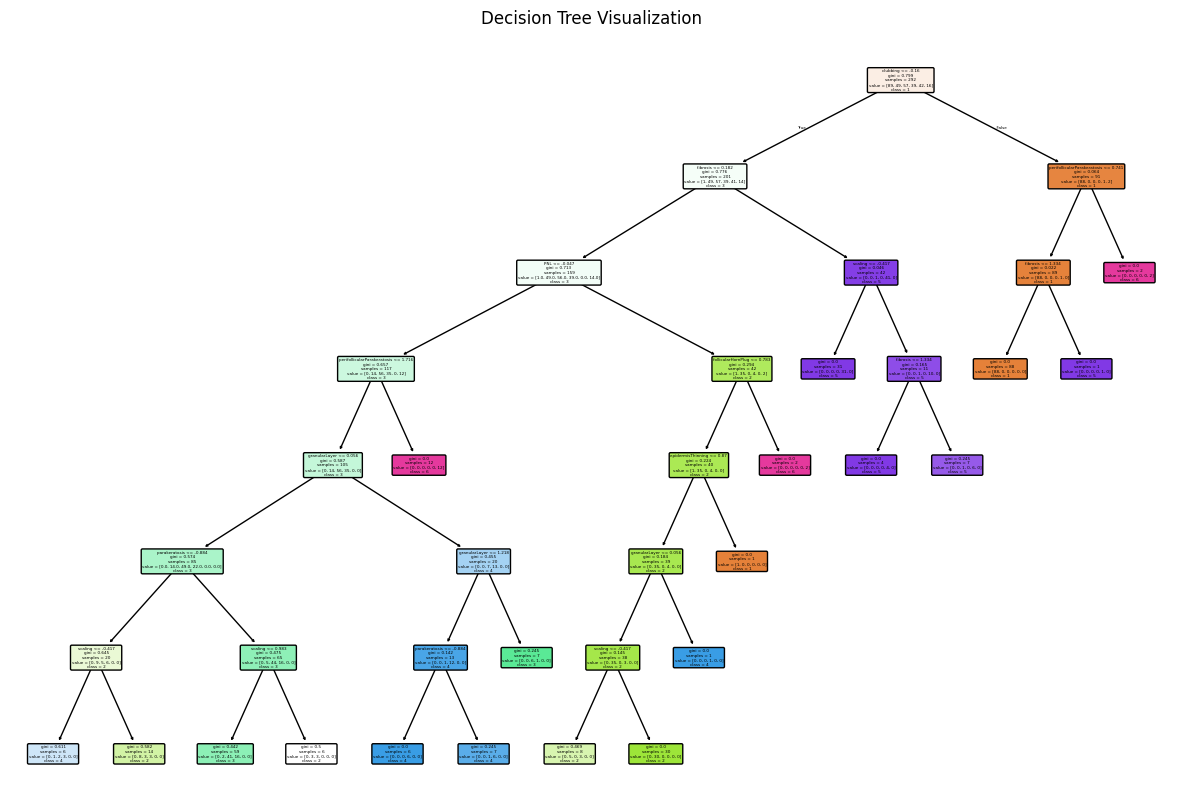

In [20]:
feature_names = [
    'fibrosis', 'follicularPapules', 'perifollicularParakeratosis', 'follicularHornPlug',
    'parakeratosis', 'granularLayer', 'spongiformPustule', 'scaling', 'munroMicroabcess',
    'scalp', 'PNL', 'clubbing', 'epidermisThinning'
]

# Plot the decision tree with the correct feature names
plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, filled=True, feature_names=feature_names, class_names=[str(i) for i in sorted(y_train.unique())], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
